#### Date created: 8/11/204 <br>
#### Purpose: To categorize exoplanet "types" and understand the type distribution of the Exoplanet Archive.

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from astropy.time import Time
from astropy.constants import G
from astropy.constants import M_sun
import astropy.units as u
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
from geopy import geocoders  
from geopy.geocoders import Nominatim
from astropy.coordinates import EarthLocation, AltAz, SkyCoord
from exo_horoscope import main
import warnings
import importlib.resources
import os
from astropy.io import ascii

In [9]:
with importlib.resources.path('exo_horoscope', 'main.py') as package_root_path:
    package_root = package_root_path.parent

catalog_path = os.path.join(package_root, 'confirmed_exoplanets_table.ecsv')

if not os.path.exists(catalog_path):
   from exo_horoscope import update_exoplanet_catalog

with importlib.resources.path('exo_horoscope', 'confirmed_exoplanets_table.ecsv') as catalog_path:
    exoplanets_table = ascii.read(catalog_path)

In [19]:
a_arr = np.asarray(exoplanets_table["pl_orbsmax"].value)

In [21]:
print(min(a_arr), max(a_arr))

0.0044 19000.0


In [29]:
np.nanmean(a_arr)

16.261879872730642

In [41]:
keep_less_than_30 = np.where(a_arr < 30) #very sparsely sampled above 30 AU, makes sense. Jupiter is ~5
a_arr = a_arr[keep_less_than_30]

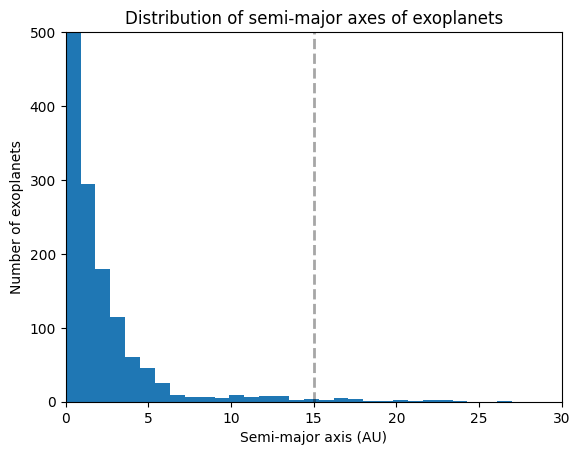

In [51]:
plt.hist(a_arr, bins=30)
plt.axvline(15, color='k', linestyle='dashed', linewidth=2, alpha=0.35)
plt.xlim(0, 30) 
plt.ylim(0, 500)
plt.xlabel('Semi-major axis (AU)')
plt.ylabel('Number of exoplanets')
plt.title('Distribution of semi-major axes of exoplanets')
plt.show()